# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>JELILI AKINOSHUN</h2>

# Data

In [1083]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [1084]:
# Read csv
df = pd.read_csv("winequality.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [1085]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.shape


(1599, 12)

In [1086]:
df.groupby("quality").size()  # distribution of the Quality 
# Clearly the quality 5 has a higher data distribution in the datasets

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [1087]:

import warnings

warnings.simplefilter("ignore")


In [1088]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [1089]:
df.duplicated().sum()

240

In [1090]:
df = df.drop_duplicates()
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [1091]:
df.duplicated().sum() # Now Data is clear of duplicate Values

0

In [1092]:
df.isnull().sum() #  our data is clean with no Missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1093]:
df.corrwith(df["quality"]).abs().sort_values() # we are looking at the correlation with the Qulaity y all the Features

#  clearly, The Residual Sugar, Free Sulphur dioxide, PH, fixed acidity and 
#  chlorides have the least correlation with the wine quality


residual sugar          0.013640
free sulfur dioxide     0.050463
pH                      0.055245
fixed acidity           0.119024
chlorides               0.130988
total sulfur dioxide    0.177855
density                 0.184252
citric acid             0.228057
sulphates               0.248835
volatile acidity        0.395214
alcohol                 0.480343
quality                 1.000000
dtype: float64

In [1094]:
A = df.groupby("quality").apply(lambda Group: Group.corrwith(Group["alcohol"])).dropna(axis =1)
A
# correlation of every other features with alcohol grouped by all quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3            -0.587774          0.717392    -0.755958        0.379967   
4            -0.386421          0.075597    -0.164026        0.351103   
5             0.026837         -0.009436    -0.011795        0.058358   
6            -0.153086         -0.103603     0.057069        0.001934   
7            -0.357057          0.033743    -0.071170        0.094809   
8            -0.466920          0.521758    -0.439073        0.231598   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3        -0.281697            -0.157897             -0.448725 -0.490591   
4        -0.177733            -0.219178             -0.120225 -0.424285   
5        -0.173994            -0.141216             -0.246665 -0.304658   
6        -0.217431             0.045660             -0.094899 -0.556473   
7        -0.220052            -0.004755              0.150034 -0.571821   
8        -0.168339             0.315862              0.429562 -0.521238   

               pH  sulphates  alcohol  
quality                                
3        0.850144  -0.416332      1.0  
4        0.521829  -0.137167      1.0  
5        0.236477  -0.033160      1.0  
6        0.222789  -0.041006      1.0  
7        0.303186  -0.021488      1.0  
8        0.690449  -0.286205      1.0

# Exploratory Data Analysis

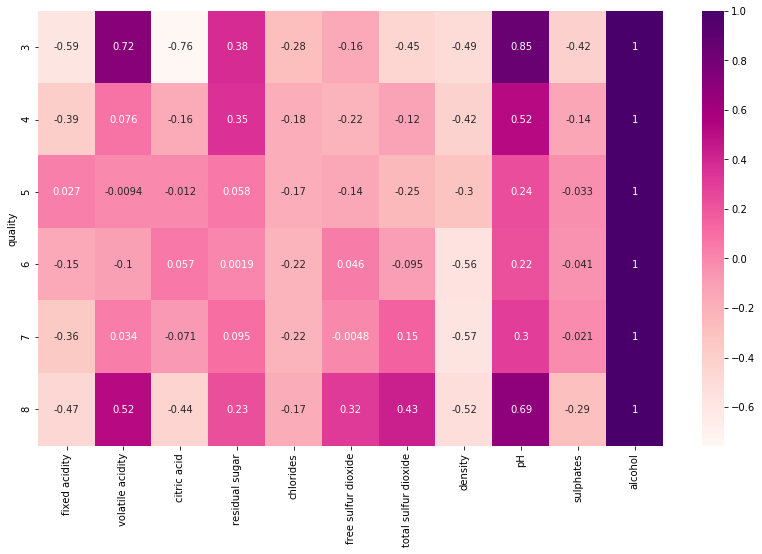

In [1095]:
plt.figure(figsize = (14,8))
ax = sb.heatmap(A, annot = True, cmap = "RdPu")

# From Here we can see that PH and Volatile acidity correlation with alcohol gives the lowest quality of winee

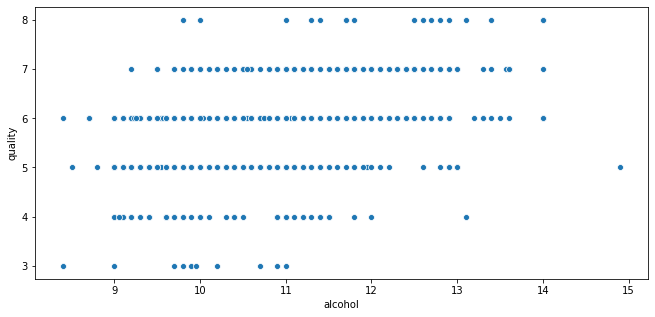

In [1096]:
sb.scatterplot(x= "alcohol", y = "quality", data = df)

# this clearly shows that the the higher the alcohol,the higher the quality

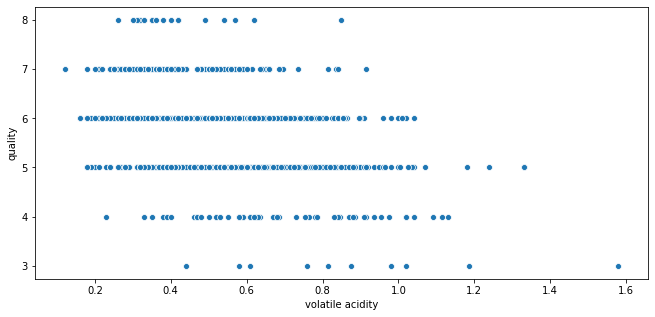

In [1097]:
sb.scatterplot(x= "volatile acidity", y = "quality", data = df)
# as we can see, The lower the volitile acidity, the higher the quality

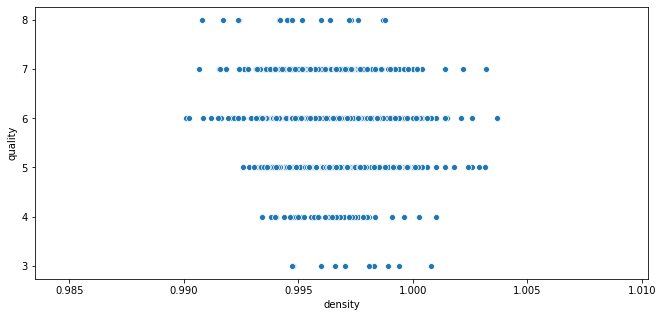

In [1098]:
sb.scatterplot(x= "density", y = "quality", data = df)

In [1099]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

fixed acidity              AxesSubplot(0.125,0.772143;0.110714x0.107857)
volatile acidity        AxesSubplot(0.257857,0.772143;0.110714x0.107857)
citric acid             AxesSubplot(0.390714,0.772143;0.110714x0.107857)
residual sugar          AxesSubplot(0.523571,0.772143;0.110714x0.107857)
chlorides               AxesSubplot(0.656429,0.772143;0.110714x0.107857)
free sulfur dioxide     AxesSubplot(0.789286,0.772143;0.110714x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.642714;0.110714x0.107857)
density                 AxesSubplot(0.257857,0.642714;0.110714x0.107857)
pH                      AxesSubplot(0.390714,0.642714;0.110714x0.107857)
sulphates               AxesSubplot(0.523571,0.642714;0.110714x0.107857)
alcohol                 AxesSubplot(0.656429,0.642714;0.110714x0.107857)
quality                 AxesSubplot(0.789286,0.642714;0.110714x0.107857)
dtype: object

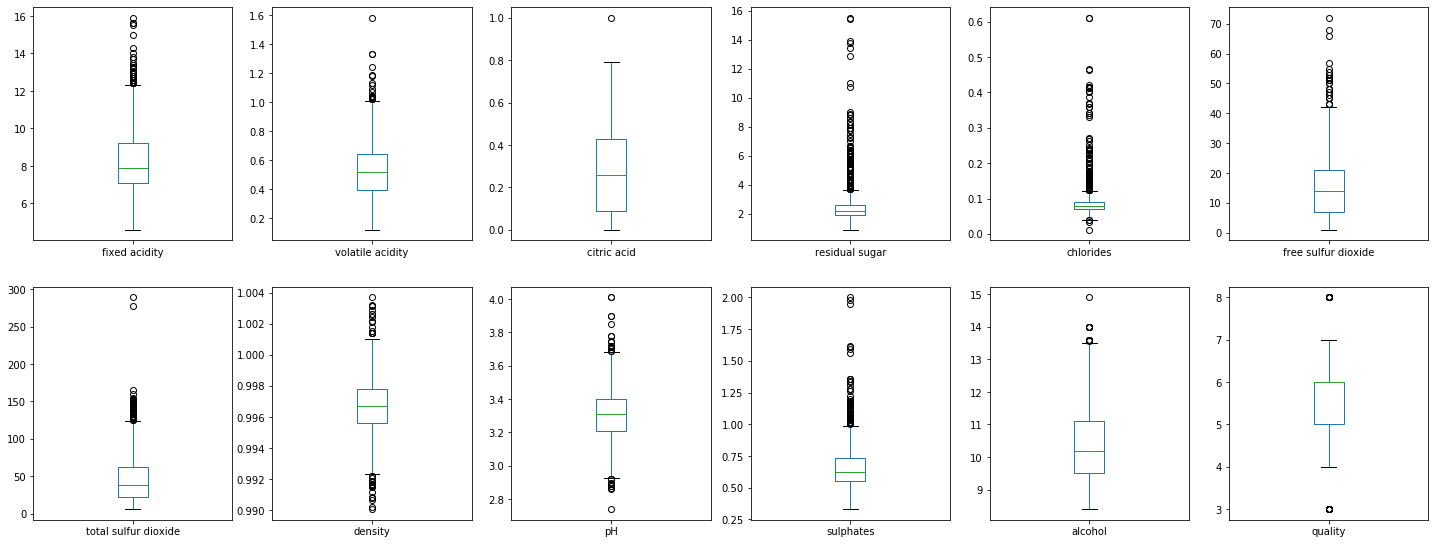

In [1100]:
df.plot(kind = "box", subplots = True, layout = (6,6), figsize = (25,30))

# As we can see from here, we have outliers in residula sugar, PH, sulphates, density, free sulphur dioxide and chlorides

In [1101]:
#  Lets check the correlation of this data

In [1102]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

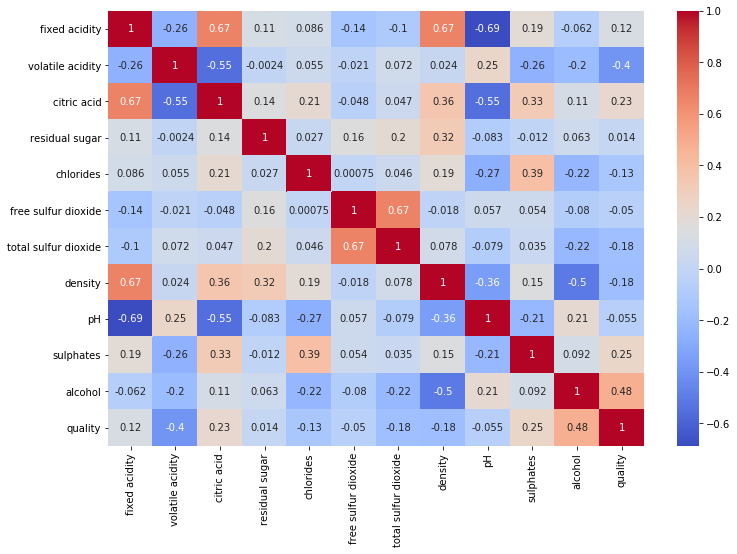

In [1103]:
# visualizing this correlation with a heatmap

plt.figure(figsize= (12,8))

sb.heatmap(df.corr(), annot = True, cmap = "coolwarm")












In [1104]:
df.corrwith(df["quality"])

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
dtype: float64

In [1105]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [1106]:
df["Wine_Grade"] = pd.cut(df["quality"], bins = [2, 4, 6, 10], labels = ["Poor", "Average", "Good"])

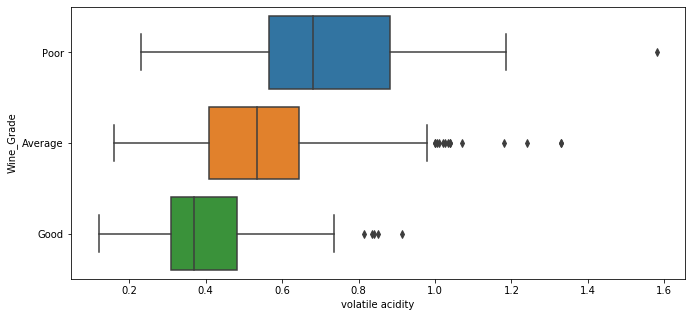

In [1107]:
sb.boxplot(df["volatile acidity"], y = "Wine_Grade", data = df)

In [1108]:
df.groupby("Wine_Grade").size()

Wine_Grade
Poor         63
Average    1112
Good        184
dtype: int64

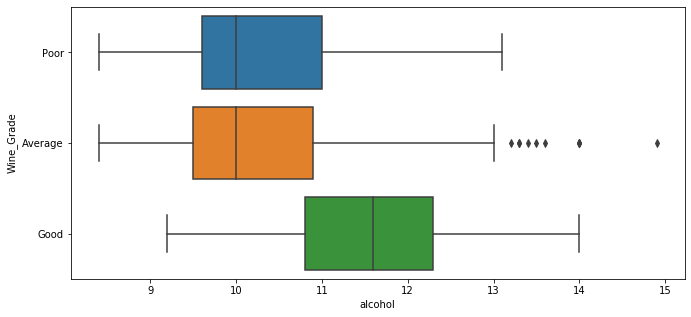

In [1109]:
sb.boxplot(y="Wine_Grade", x ="alcohol", data = df)

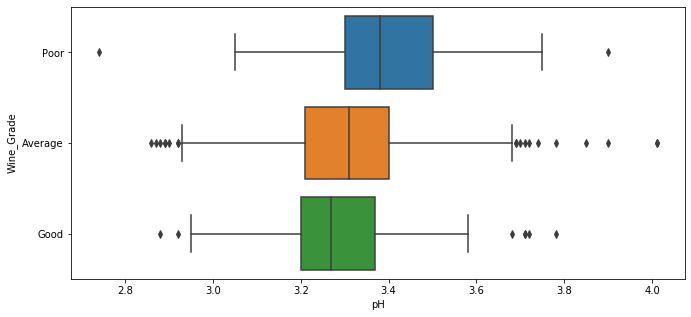

In [1110]:
sb.boxplot(y="Wine_Grade", x ="pH", data = df)

# pH hasno significant effect on the wine quality

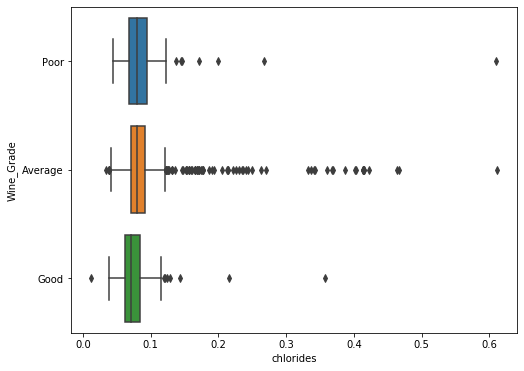

In [1111]:
plt.figure(figsize = (8,6))
sb.boxplot(y="Wine_Grade", x ="chlorides", data = df)

# Clearly chlorides has no effect on the quality of the wine

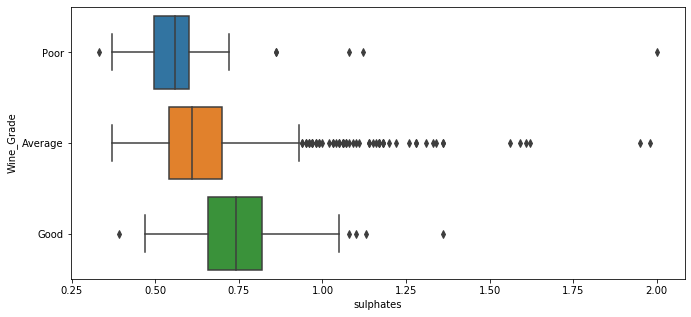

In [1112]:
sb.boxplot(y="Wine_Grade", x ="sulphates", data = df)

# The Greater the sulphate, the greater the quality of the wine

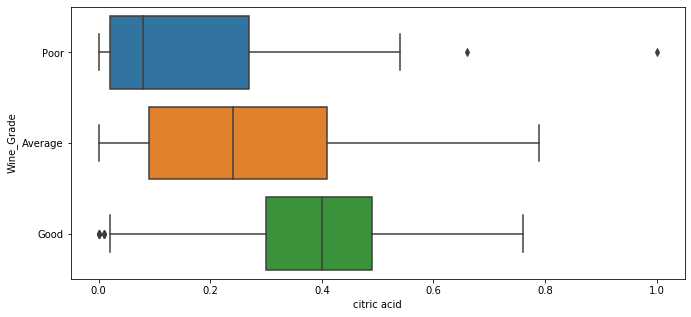

In [1113]:
sb.boxplot(y="Wine_Grade", x ="citric acid", data = df)
# The greater the citric acid, the better the wine

#  50cent of Good wine has a greter proportion of citric acid

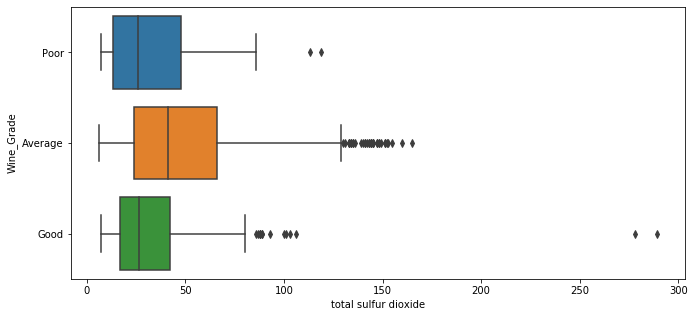

In [1114]:
sb.boxplot( y= "Wine_Grade", x = "total sulfur dioxide", data = df)

# An outliers showing that higher sulphur content is increases wine quality

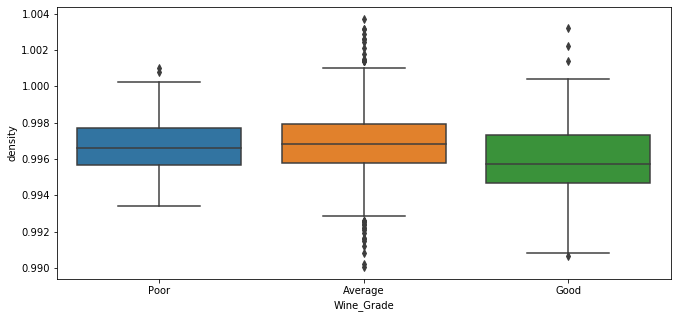

In [1115]:
sb.boxplot( x= "Wine_Grade", y = "density", data = df)


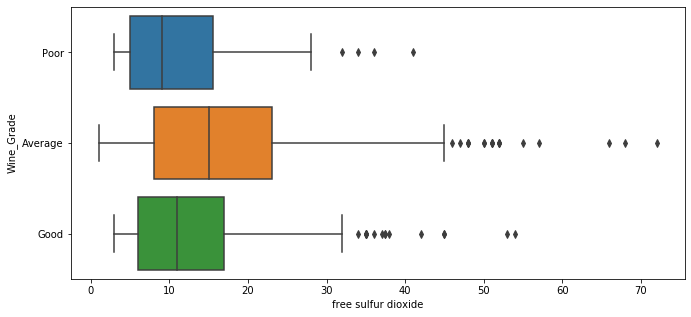

In [1116]:
sb.boxplot( y= "Wine_Grade", x = "free sulfur dioxide", data = df)


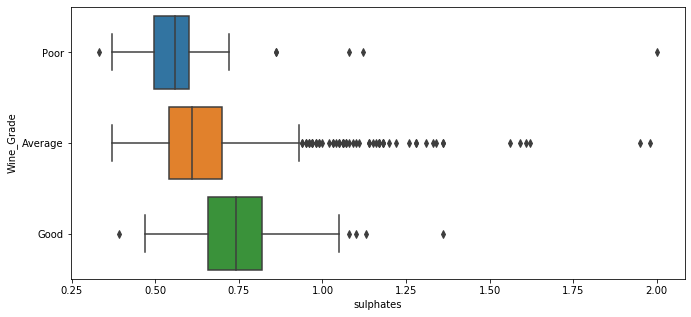

In [1117]:
sb.boxplot( y= "Wine_Grade", x = "sulphates", data = df)


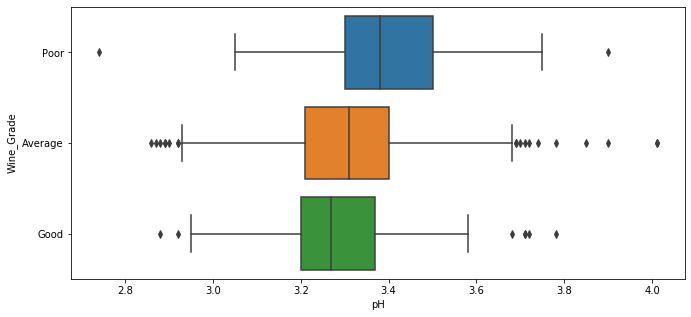

In [1118]:
sb.boxplot( y= "Wine_Grade", x = "pH", data = df)


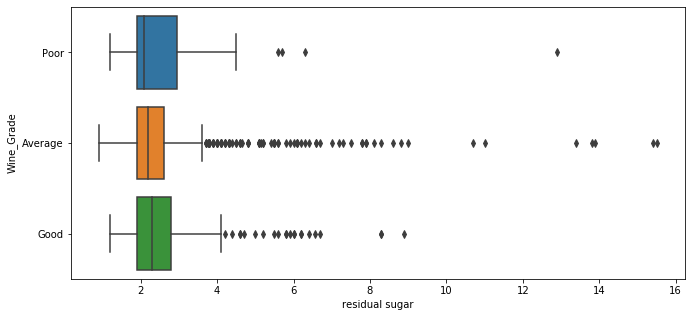

In [1119]:
sb.boxplot( y= "Wine_Grade", x = "residual sugar", data = df)
# Residual Sugar has no effect on the quality of wine as shown

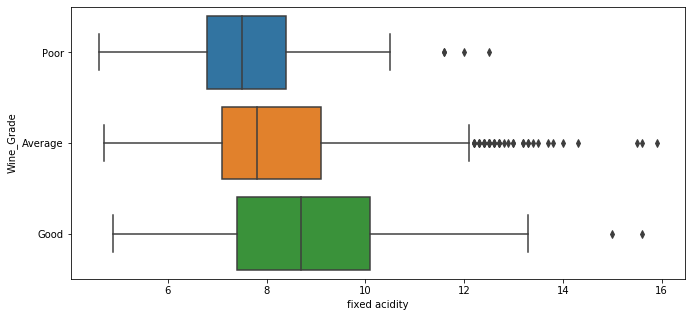

In [1120]:
sb.boxplot( y= "Wine_Grade", x = "fixed acidity", data = df)


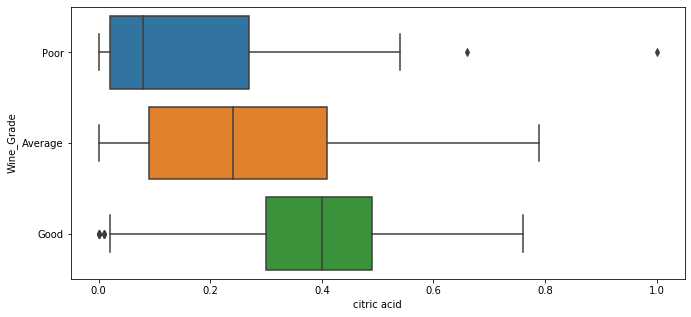

In [1121]:
sb.boxplot( y= "Wine_Grade", x = "citric acid", data = df)


In [1122]:
X = df.drop(["density", "residual sugar", "chlorides", "quality", "Wine_Grade"], axis = 1)

In [1123]:
X

fixed acidity  volatile acidity  citric acid  free sulfur dioxide  \
0               7.4             0.700         0.00                 11.0   
1               7.8             0.880         0.00                 25.0   
2               7.8             0.760         0.04                 15.0   
3              11.2             0.280         0.56                 17.0   
5               7.4             0.660         0.00                 13.0   
...             ...               ...          ...                  ...   
1593            6.8             0.620         0.08                 28.0   
1594            6.2             0.600         0.08                 32.0   
1595            5.9             0.550         0.10                 39.0   
1597            5.9             0.645         0.12                 32.0   
1598            6.0             0.310         0.47                 18.0   

      total sulfur dioxide    pH  sulphates  alcohol  
0                     34.0  3.51       0.56      9.4  
1                     67.0  3.20       0.68      9.8  
2                     54.0  3.26       0.65      9.8  
3                     60.0  3.16       0.58      9.8  
5                     40.0  3.51       0.56      9.4  
...                    ...   ...        ...      ...  
1593                  38.0  3.42       0.82      9.5  
1594                  44.0  3.45       0.58     10.5  
1595                  51.0  3.52       0.76     11.2  
1597                  44.0  3.57       0.71     10.2  
1598                  42.0  3.39       0.66     11.0  

[1359 rows x 8 columns]

In [1124]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Wine_Grade'],
      dtype='object')

X =  data[['alcohol','density','sulphates','pH','free_sulfur_dioxide','citric_acid']]

In [1125]:
#  feature engineering starting here

from sklearn.preprocessing import LabelEncoder

In [1126]:
Label = LabelEncoder()

df["Wine_Grade"] = Label.fit_transform(df["Wine_Grade"])

In [1127]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [1128]:
# exploring the Correlation of the new data

# sb.pairplot(df, hue = "Grade")

In [1129]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  Wine_Grade  
0      9.4        5           0  
1      9.8        5           0  
2      9.8        5           0  
3      9.8        6           0  
5      9.4        5           0

In [1130]:
Wine_corr = df.groupby("Wine_Grade").apply(lambda Group: Group.corrwith(df["quality"])).drop("Wine_Grade", axis = 1)
Wine_corr

fixed acidity  volatile acidity  citric acid  residual sugar  \
Wine_Grade                                                                 
0                0.049372         -0.240359     0.092005       -0.019744   
1               -0.061084          0.049212     0.016653       -0.029611   
2               -0.129709         -0.283044     0.005596        0.012681   

            chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Wine_Grade                                                                   
0           -0.089179            -0.072737             -0.250649 -0.143781   
1           -0.081863            -0.006474             -0.008288 -0.127771   
2           -0.156034             0.051304              0.158330 -0.203671   

                  pH  sulphates   alcohol  quality  
Wine_Grade                                          
0           0.056222   0.151655  0.390012      1.0  
1          -0.029954   0.069534  0.191529      1.0  
2          -0.034691   0.043376  0.124405      1.0

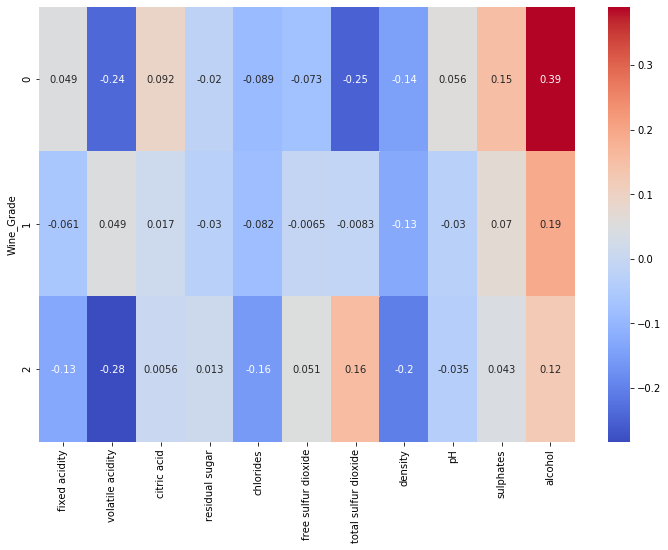

In [1131]:
plt.figure(figsize = (12,8))
sb.heatmap(Wine_corr.drop("quality", axis =1), annot = True, cmap = "coolwarm")

# This shows total sulphur oxide, fixed aciidity, volotitile acidity, pH has a poor  correlation with Excellent wine

In [1132]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  Wine_Grade  
0      9.4        5           0  
1      9.8        5           0  
2      9.8        5           0  
3      9.8        6           0  
5      9.4        5           0

In [1133]:
%matplotlib inline

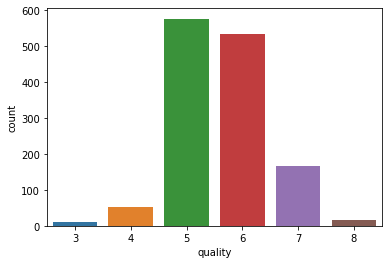

In [1134]:
# Our label Distribution (countplot)

sb.countplot("quality", data = df)

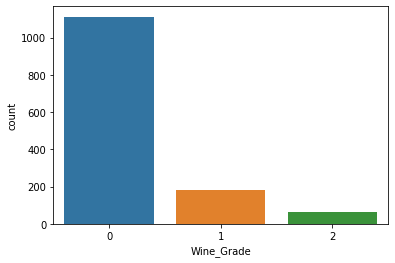

In [1135]:
sb.countplot(df["Wine_Grade"])

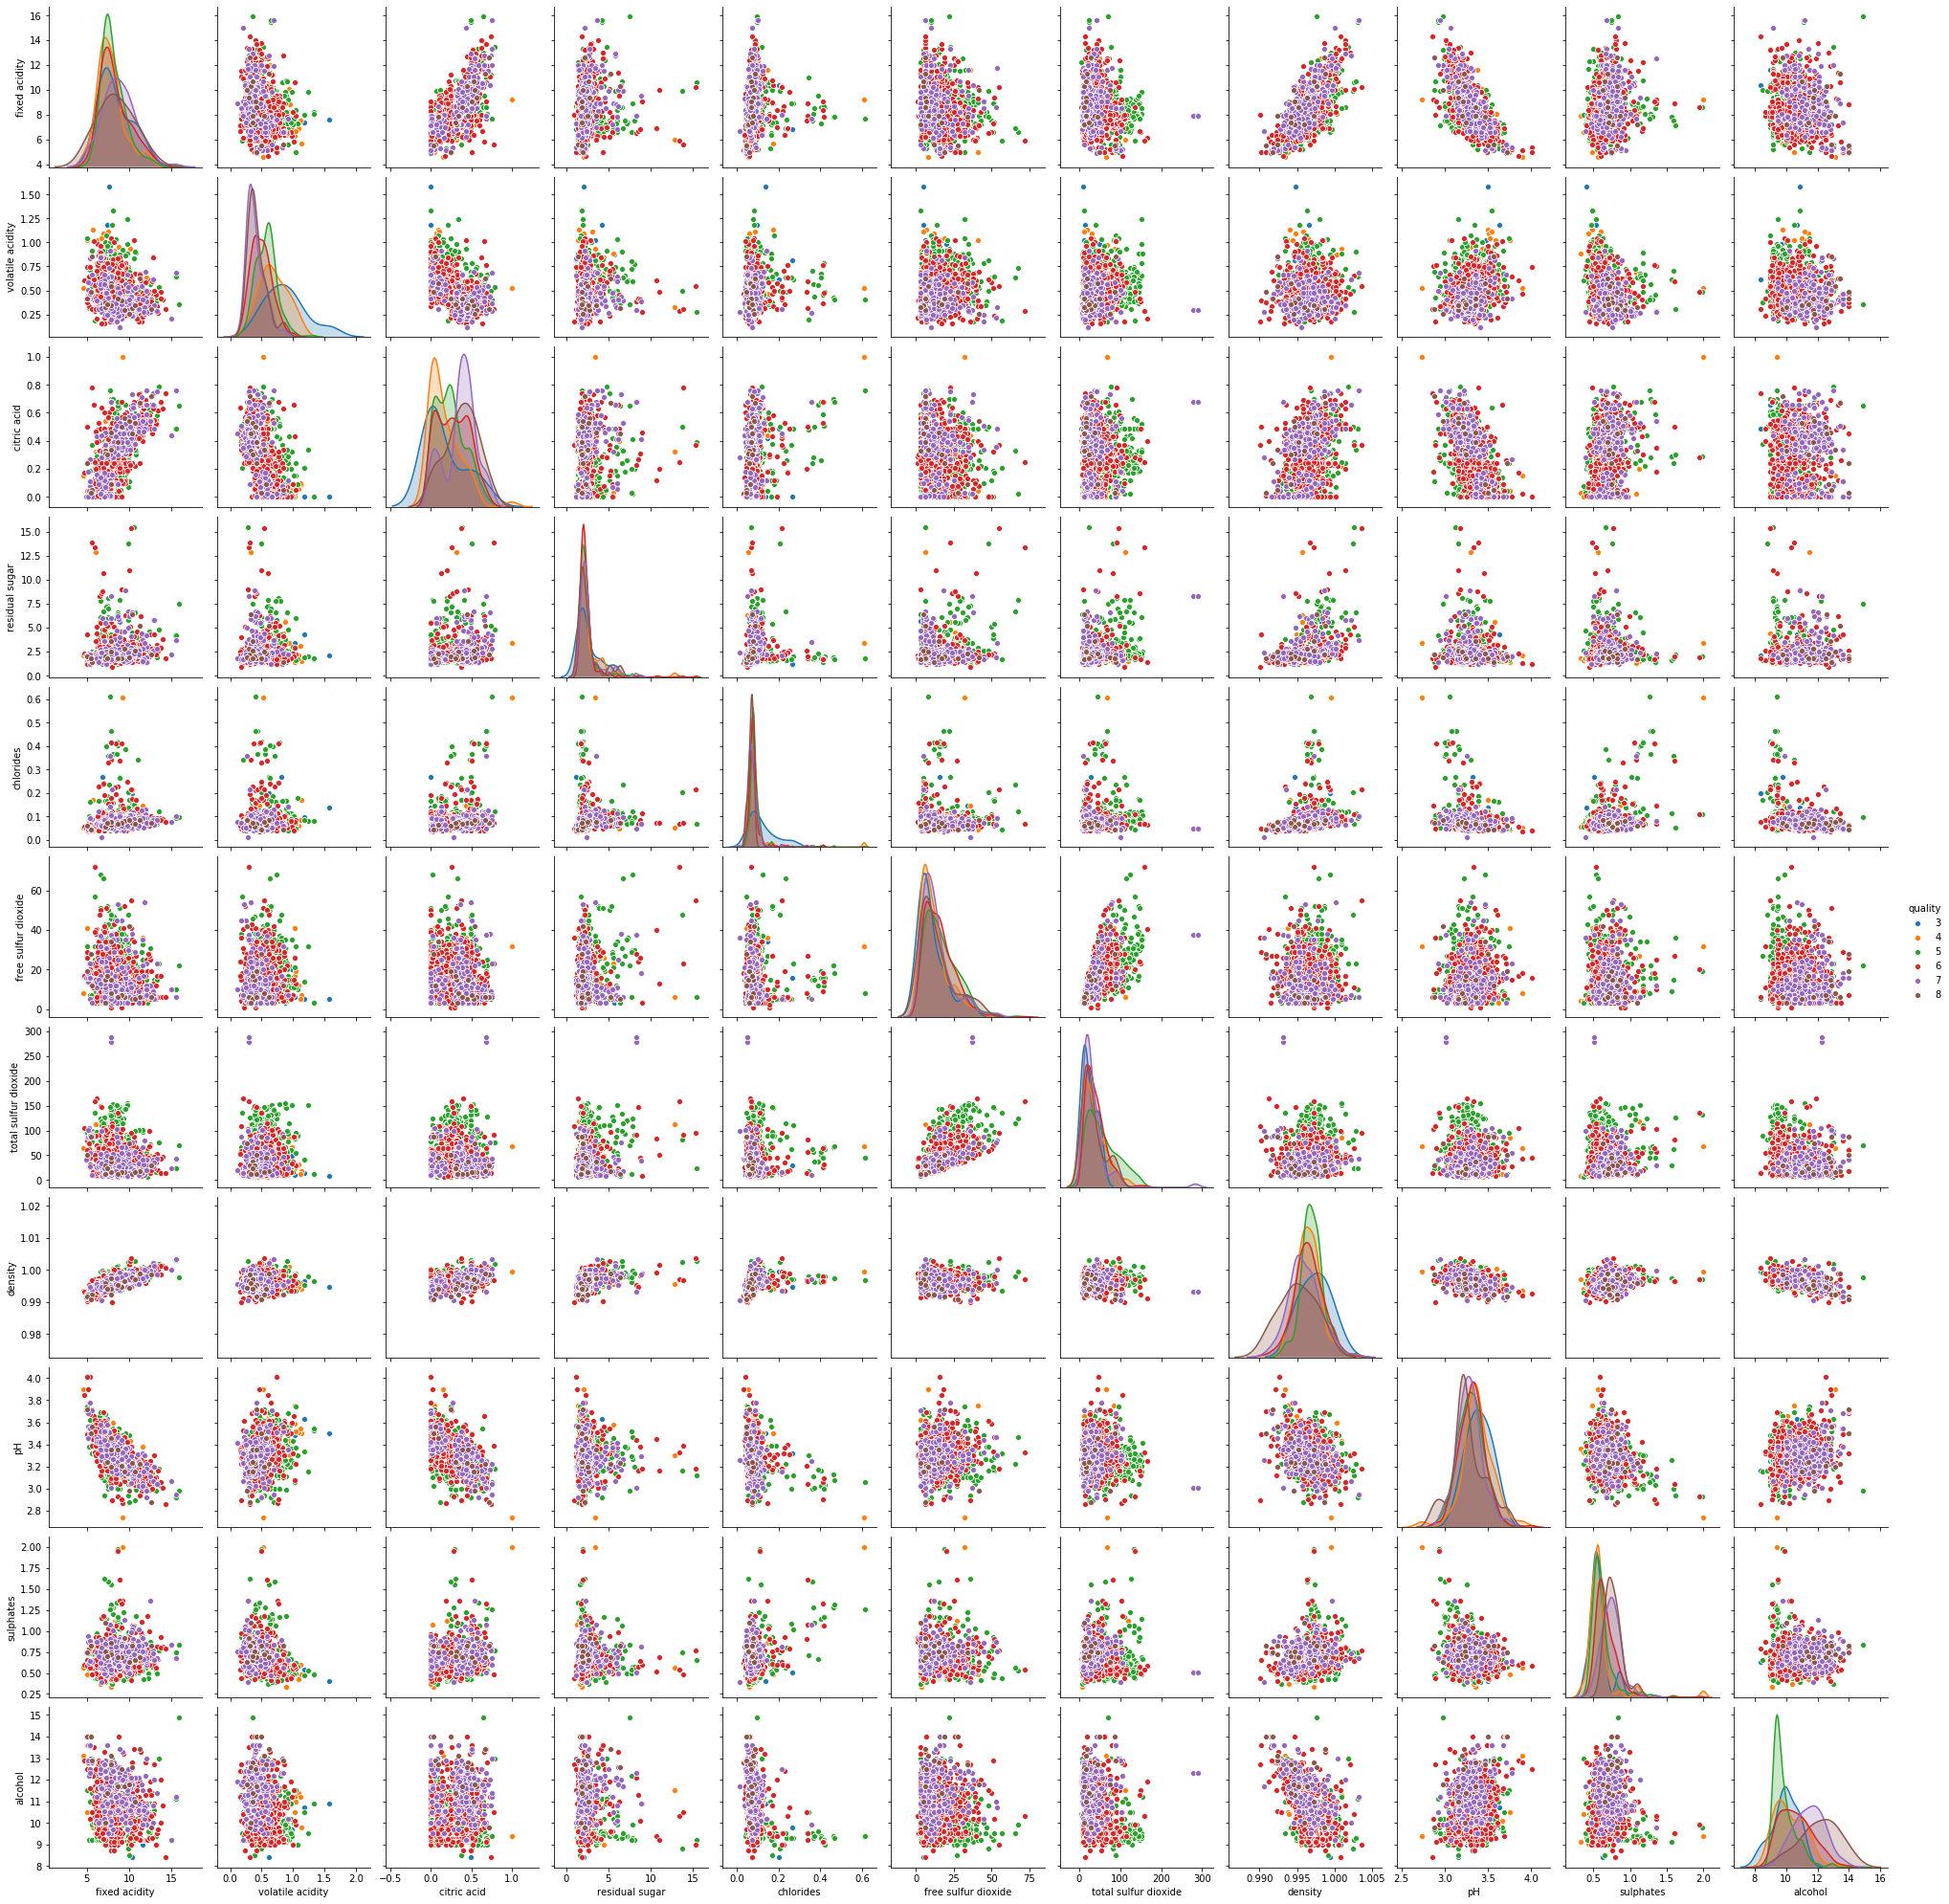

In [1136]:
sb.pairplot(data = df.drop("Wine_Grade", axis = 1), hue = "quality")

#  here there is high level of correlation between these features

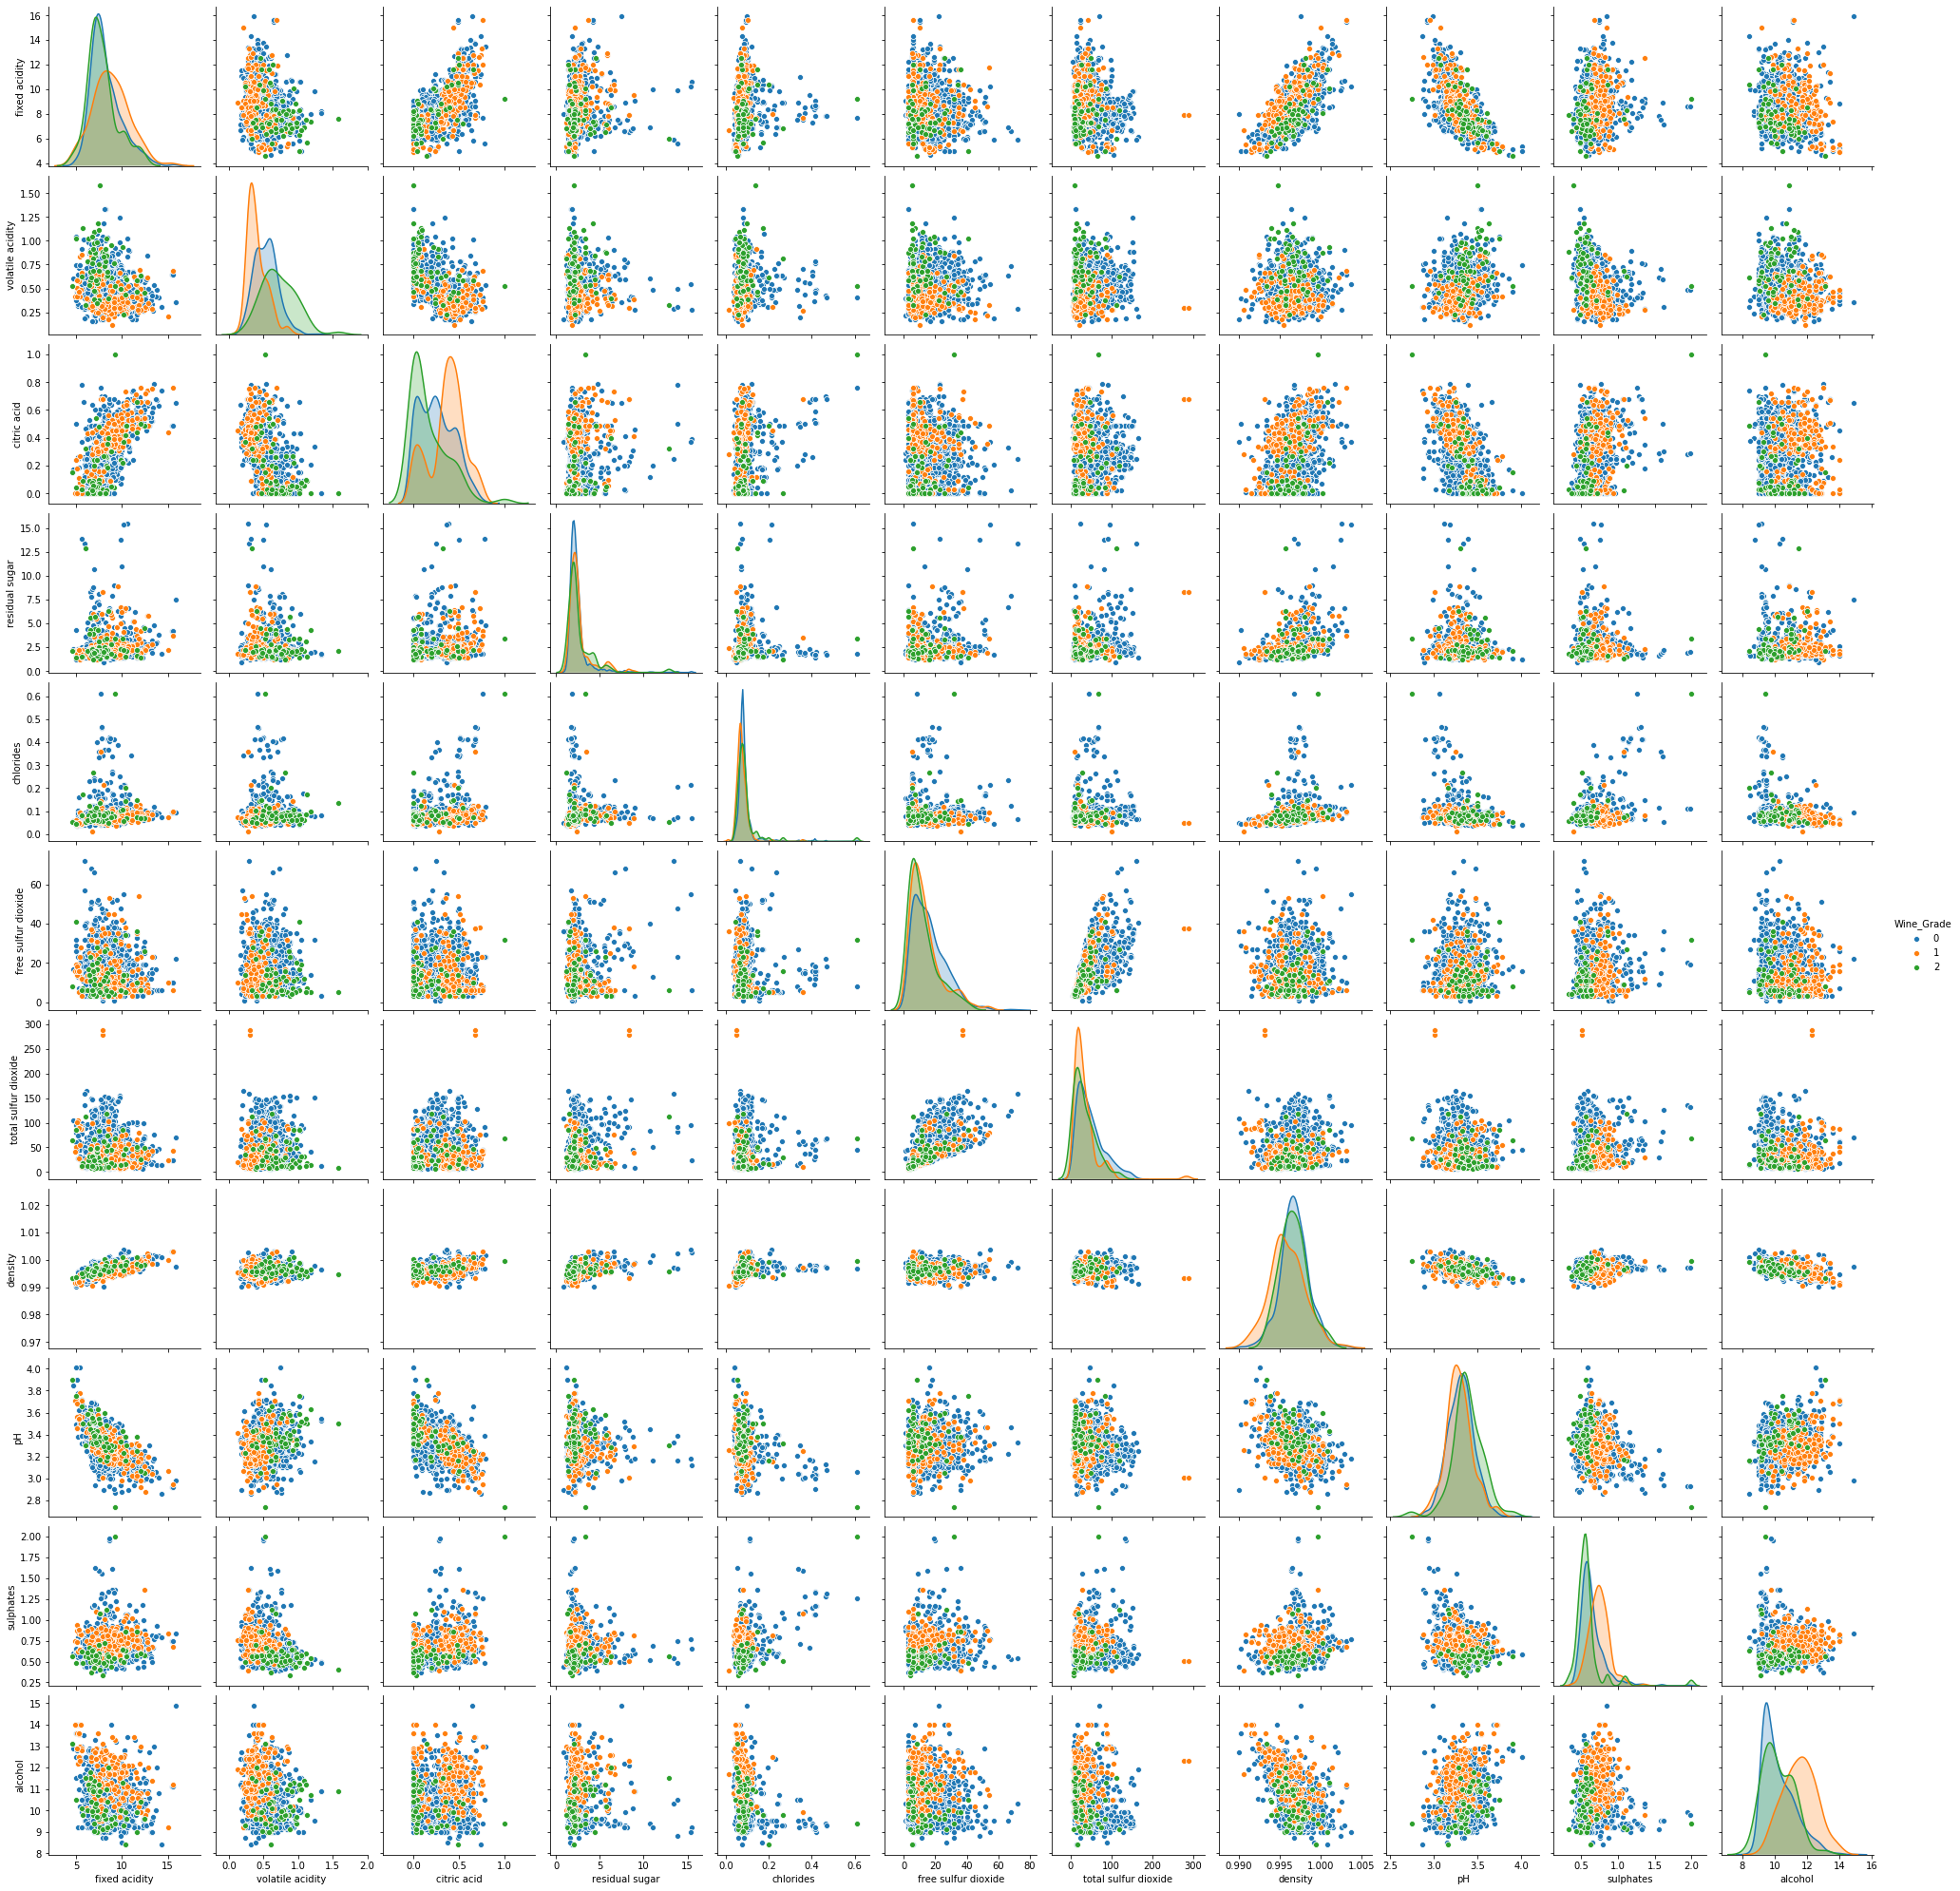

In [1137]:
sb.pairplot(data = df.drop("quality", axis = 1), hue = "Wine_Grade")

# the Wine categorical Values Further shows the distribution and correlation of these features with the wine quality to be strong

In [1138]:
plt.rcParams['figure.figsize'] = (11.0, 5.0)

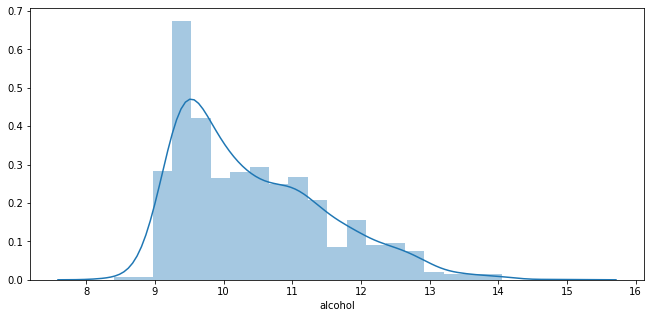

In [1139]:
sb.distplot(df["alcohol"]) # Here we are having almost normal distribution

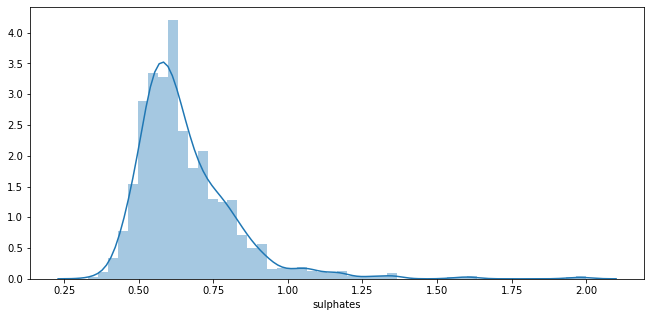

In [1140]:
sb.distplot(df["sulphates"])

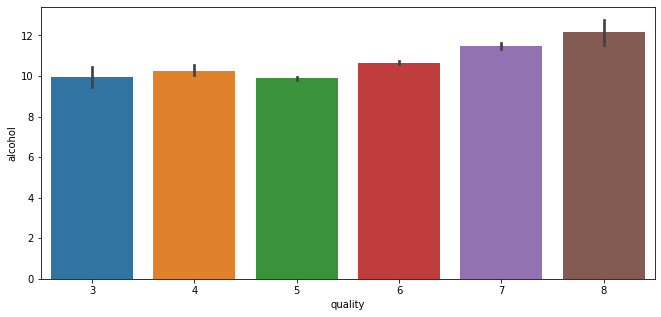

In [1141]:
sb.barplot(x="quality", y = "alcohol", data = df )

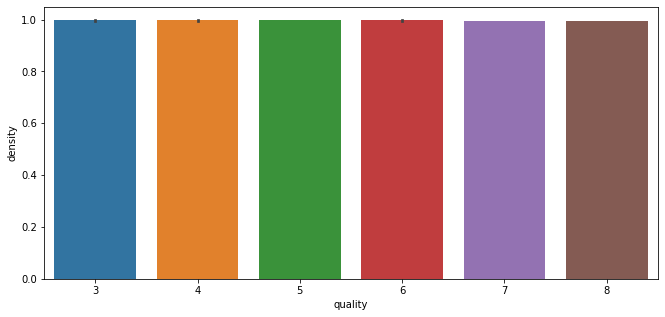

In [1142]:
sb.barplot(x="quality", y = "density", data = df )

In [1143]:
from sklearn.model_selection import train_test_split

In [1144]:
X

fixed acidity  volatile acidity  citric acid  free sulfur dioxide  \
0               7.4             0.700         0.00                 11.0   
1               7.8             0.880         0.00                 25.0   
2               7.8             0.760         0.04                 15.0   
3              11.2             0.280         0.56                 17.0   
5               7.4             0.660         0.00                 13.0   
...             ...               ...          ...                  ...   
1593            6.8             0.620         0.08                 28.0   
1594            6.2             0.600         0.08                 32.0   
1595            5.9             0.550         0.10                 39.0   
1597            5.9             0.645         0.12                 32.0   
1598            6.0             0.310         0.47                 18.0   

      total sulfur dioxide    pH  sulphates  alcohol  
0                     34.0  3.51       0.56      9.4  
1                     67.0  3.20       0.68      9.8  
2                     54.0  3.26       0.65      9.8  
3                     60.0  3.16       0.58      9.8  
5                     40.0  3.51       0.56      9.4  
...                    ...   ...        ...      ...  
1593                  38.0  3.42       0.82      9.5  
1594                  44.0  3.45       0.58     10.5  
1595                  51.0  3.52       0.76     11.2  
1597                  44.0  3.57       0.71     10.2  
1598                  42.0  3.39       0.66     11.0  

[1359 rows x 8 columns]

In [1146]:
Y = df["quality"]
Y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [1272]:
# Scaling the feature by standardization to generate new features for train and test dataset


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1149]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [1150]:
X_Train.shape

(951, 8)

In [1151]:
Y_Train.shape

(951,)

In [1152]:
scaler = StandardScaler()

In [1153]:
X_Train = scaler.fit_transform(X_Train)
X_Test =  scaler.fit_transform(X_Test)



X_Train.shape, X_Test.shape,



((951, 8), (408, 8))

In [1154]:
Y_Train.shape, Y_Test.shape

((951,), (408,))

# Model SELECTION AND METRICS EVALUATION

In [1167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor

In [1168]:
models = [DecisionTreeClassifier(), RandomForestClassifier(),  LinearSVC(),  KNeighborsRegressor()]

In [1201]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# DECISION TREE MODEL


In [1233]:

Tree = DecisionTreeClassifier(max_depth = 4)

In [1234]:
Tree.fit(X_Train, Y_Train )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1261]:
predict = Tree.predict(X_Test)

In [1264]:
print("Accuracy of Decision tree: ", accuracy_score(Y_Test, predict).round(2))

Accuracy of Decision tree:  0.53


In [1273]:
print(classification_report(predict, Y_Test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.15      0.33      0.21         6
           5       0.65      0.59      0.62       191
           6       0.47      0.49      0.48       156
           7       0.52      0.47      0.50        55
           8       0.00      0.00      0.00         0

    accuracy                           0.53       408
   macro avg       0.30      0.31      0.30       408
weighted avg       0.56      0.53      0.54       408



# KNN MODEL

In [1237]:
KNN = KNeighborsRegressor(n_neighbors = 1)

In [1241]:
KNN.fit(X_Train, Y_Train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [1245]:
predict_KNN = KNN.predict(X_Test)
print(accuracy_score(predict_KNN, Y_Test).round(2))
print(accuracy)

0.52


# Random Forest Model

In [1185]:


Random = RandomForestClassifier(n_estimators = 200, random_state = 42)
Random.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1247]:
pred_random = Random.predict(X_Test)

In [1268]:
print("Random Forest Accuracy:", accuracy_score(pred_random, Y_Test.round(2)))
print()
print(classification_report(pred_random, Y_test))

Random Forest Accuracy: 0.6225490196078431

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.72      0.69      0.71       179
           6       0.68      0.56      0.61       197
           7       0.38      0.66      0.48        29
           8       0.00      0.00      0.00         1

    accuracy                           0.62       408
   macro avg       0.30      0.32      0.30       408
weighted avg       0.67      0.62      0.64       408



In [1216]:
random_matrix = confusion_matrix(pred_random, Y_Test)
random_matrix

array([[  0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  4,   6, 124,  43,   2,   0],
       [  1,   6,  47, 111,  28,   4],
       [  0,   0,   1,   9,  19,   0],
       [  0,   0,   0,   0,   1,   0]], dtype=int64)

In [1231]:
pd.crosstab(Y_Test, pred_random)

# This shows the accuracy of our prediction with failures

# The Quality 5 was  correctly Predicted 124 timesand wrongly predicted 48 times 



col_0    3  4    5    6   7  8
quality                       
3        0  0    4    1   0  0
4        1  0    6    6   0  0
5        0  0  124   47   1  0
6        0  1   43  111   9  0
7        0  0    2   28  19  1
8        0  0    0    4   0  0

In [1224]:
# CROSS Validation Score

In [1225]:
from sklearn.model_selection import cross_val_score

In [1269]:
rfc_eval = cross_val_score(estimator = rfc,  X = X_Train,  y = Y_Train, cv = 10)
print("Accuracy of cross_val_score :", rfc_eval.mean())

Accuracy of cross_val_score : 0.5824780701754386


# SVC Model Prediction

In [1191]:
SVM = LinearSVC()

In [1192]:
SVM.fit(X_Train, Y_Train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [1193]:
S = SVM.predict(X_Test)

In [1271]:


print("Accuracy of SVM: ", accuracy_score(S, Y_Test))




Accuracy of SVM:  0.5735294117647058


In [1274]:
print(classification_report(S, Y_Test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.83      0.61      0.70       231
           6       0.55      0.52      0.54       176
           7       0.02      1.00      0.04         1
           8       0.00      0.00      0.00         0

    accuracy                           0.57       408
   macro avg       0.23      0.36      0.21       408
weighted avg       0.71      0.57      0.63       408



# SUMMARY OF RESULT

#The Random Forest Model with 62.3% Gives The highest accuracy
#duplicates data in the project when removed reduced the learning process for the algorithm
#So many outliers flying aroung when I visualize the main data but i have no idea how to remove them, this also reduce the performance of the algorithm used


#we can improve efficiency by grouping the quality column to just 2 columns by turning the problem to Binary Classification problem
#Tuning with the XGboost and lasso can also help improve the acciracy of the model